# Assignment no 14 ( Decision Trees - Fraud_check)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data=pd.read_csv("Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
data.info

<bound method DataFrame.info of     Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..           

In [4]:
data["Target"] = pd.cut(data["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [5]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [6]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad'])

In [7]:
label_encoder = preprocessing.LabelEncoder()
data['Urban']= label_encoder.fit_transform(data['Urban'])

In [8]:
data['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [9]:
data['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [10]:
label_encoder = preprocessing.LabelEncoder()
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status'])

In [11]:
label_encoder = preprocessing.LabelEncoder()
data['Target']= label_encoder.fit_transform(data['Target'])

In [12]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [13]:
x=data.iloc[:,0:8]
y=data['Target']

In [14]:
x.drop(["City.Population"],axis=1,inplace=True)
x

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Target
0,0,2,68833,10,1,0
1,1,0,33700,18,1,0
2,0,1,36925,30,1,0
3,1,2,50190,15,1,0
4,0,1,81002,28,0,0
...,...,...,...,...,...,...
595,1,0,76340,7,1,0
596,1,0,69967,2,1,0
597,0,0,47334,0,1,0
598,1,1,98592,17,0,0


In [15]:
# with Marital.Status
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Target, Length: 600, dtype: int32

In [16]:
colnames = list(data.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Target']

In [17]:
# Splitting data in to training and testing process ( with 'marital status' feature)
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

## "With Target feature <br>1. Buil a Decision Tree Clasifier using Entropy"

In [18]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [19]:

model

DecisionTreeClassifier(criterion='entropy', max_depth=5)

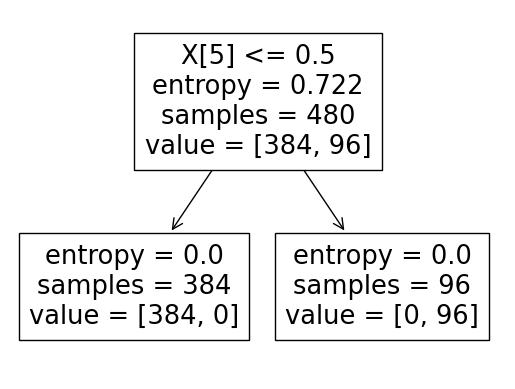

In [20]:
#Ploting the decision tree
tree.plot_tree(model);

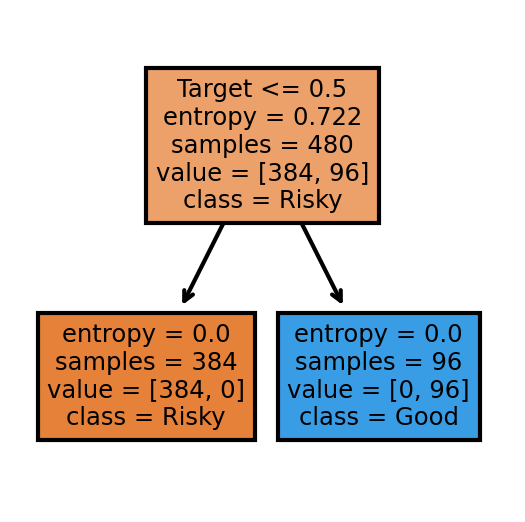

In [21]:
fn=['Undergrad','Marital.Status','Taxable.Income','Work.Experience','Urban','Target']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [23]:
# predicting on test data set 
prediction = model.predict(x_test)
# getting the count of each category  
pd.Series(prediction).value_counts() 
pd.Series(prediction).value_counts() 

0    92
1    28
dtype: int64

In [24]:
prediction

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [25]:
# getting the two way table to understand the correct and wrong predictions
pd.crosstab(y_test,prediction)

col_0,0,1
Target,,
0,92,0
1,0,28


## 2. With Gini Criteria build a Decision Tree Classifier

In [26]:
model2_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [27]:
model2_gini

DecisionTreeClassifier(max_depth=5)

In [28]:
model2_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=5)

In [29]:
 # Predicting on test data
prediction2=model.predict(x_test)

In [30]:
pd.Series(prediction2).value_counts()

0    92
1    28
dtype: int64

In [31]:
np.mean(prediction2==y_test)

1.0

## 3. Decision Tree Regression

In [32]:
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor()
model3.fit(x_train, y_train)

DecisionTreeRegressor()

In [33]:
# accuracy
model3.score(x_test,y_test)

1.0

## With Matrital Status Buil a Decision Tree Clasifier using Entropy

In [34]:
x1=data.iloc[:,0:8]
y1=data['Marital.Status']

In [35]:
# Splitting data in to training and testing process ( with 'marital status' feature)
x1_train, x1_test,y1_train,y1_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [36]:
modelx = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
modelx.fit(x1_train,y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [37]:
DecisionTreeClassifier(criterion='entropy', max_depth=5)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

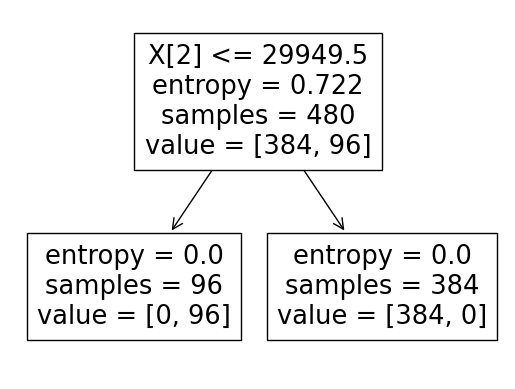

In [38]:
#Ploting the decision tree
tree.plot_tree(modelx);

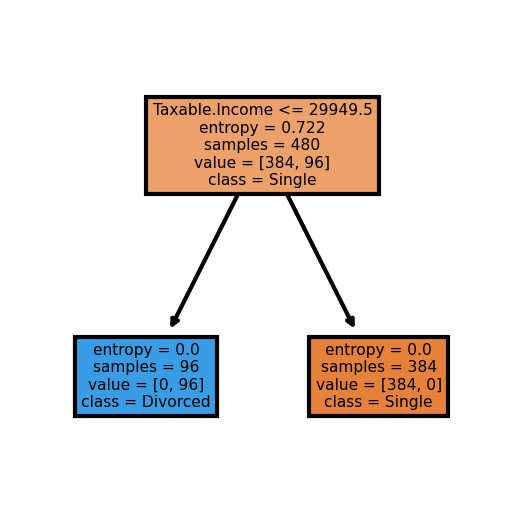

In [39]:
fn=['Undergrad','Marital.Status','Taxable.Income','Work.Experience','Urban','Target']
cn=['Single', 'Divorced', 'Married']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(modelx,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [40]:
# predicting on test data set
predictionx = model.predict(x_test) 
# getting the count of each category  
pd.Series(predictionx).value_counts()

0    92
1    28
dtype: int64

In [41]:
predictionx

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [42]:
# getting the two way table to understand the correct and wrong predictions
pd.crosstab(y_test,predictionx)

col_0,0,1
Target,,
0,92,0
1,0,28


In [43]:
# Accuracy Measuring
np.mean(predictionx==y_test)

1.0

## 2. With Gini Criteria build a Decision Tree Classifier

In [44]:
model2_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [45]:
model2_gini

DecisionTreeClassifier(max_depth=5)

In [46]:
model2_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [47]:
# Predicting on test data
predictiony=model.predict(x_test)

In [48]:
predictiony

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [49]:
pd.Series(predictiony).value_counts()

0    92
1    28
dtype: int64

# 3. Decision Tree Regression

In [50]:
modelA = DecisionTreeRegressor()
modelA.fit(x_train, y_train) 

DecisionTreeRegressor()

In [51]:
# accuracy
modelA.score(x_test,y_test)

1.0